# Day 11

Source: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
df_spotify = pd.read_csv("spotify_2023.csv", delimiter=",", encoding="utf-8")

In [183]:
df_spotify = df_spotify.dropna()
df_spotify.shape

(817, 24)

In [184]:
df_spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [185]:
df_spotify.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

<Axes: xlabel='artist(s)_name'>

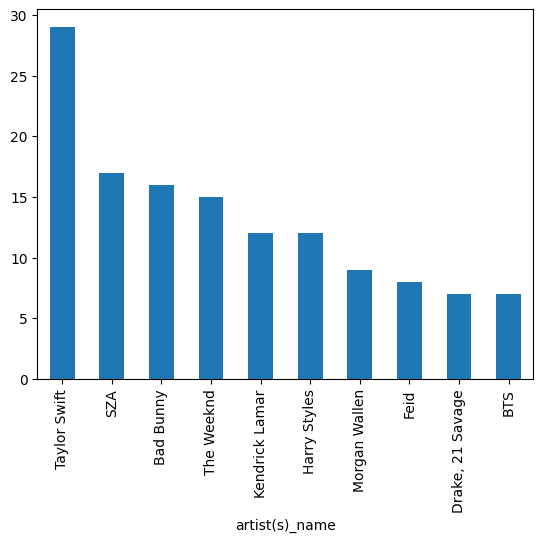

In [186]:
df_spotify["artist(s)_name"].value_counts().head(10).plot(kind="bar")

In [187]:
artist_counts = df_spotify['artist(s)_name'].value_counts().nlargest(8)
top_artists = artist_counts.index

In [188]:
filtered_data = df_spotify[df_spotify['artist(s)_name'].isin(top_artists)]

In [189]:
filtered_data['valor'] = 1  
area_data = filtered_data.groupby('artist(s)_name').sum()['valor']

C:\Users\Sergio\AppData\Local\Temp\ipykernel_17296\3725040060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['valor'] = 1  # Esta línea es un placeholder, ajusta según la columna relevante


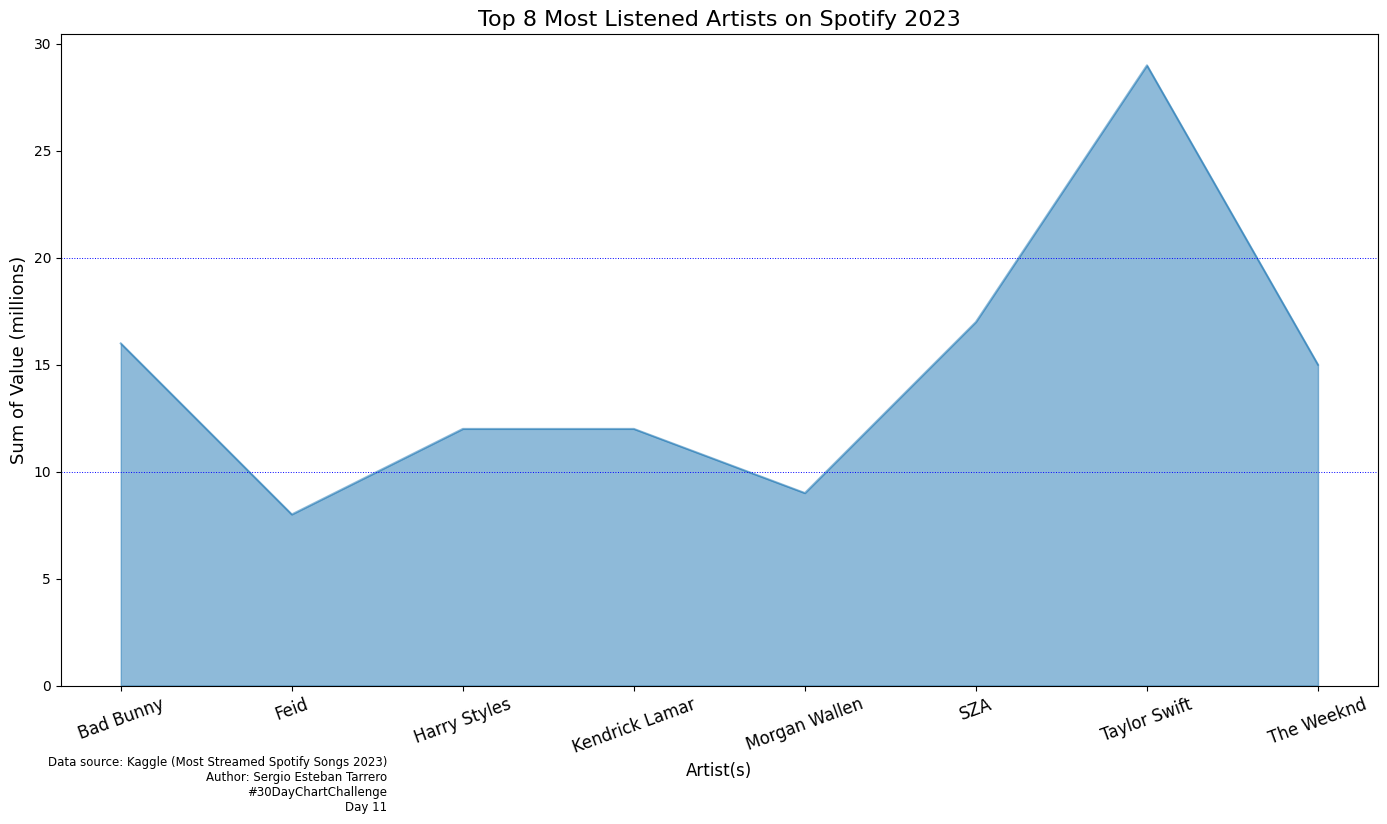

In [190]:
plt.figure(figsize=(14, 8))

area_data.plot(kind='area', stacked=False)
plt.title('Top 8 Most Listened Artists on Spotify 2023', fontsize=16)
plt.xlabel('Artist(s)', fontsize=12)
plt.ylabel('Sum of Value (millions)', fontsize=13)

# crear linea en los valores de y = 10, 20
plt.axhline(y=10, color='blue', linestyle=':', linewidth=0.7)
plt.axhline(y=20, color='blue', linestyle=':', linewidth=0.7)
#plt.axhline(y=30, color='blue', linestyle='--', linewidth=0.5)


plt.figtext(0.28, -0.02, 'Data source: Kaggle (Most Streamed Spotify Songs 2023)\nAuthor: Sergio Esteban Tarrero\n#30DayChartChallenge\nDay 11', horizontalalignment='right', fontsize=8.5)

plt.xticks(rotation=20, ha='center', fontsize=12)
plt.tight_layout()

plt.savefig('SergioEstebanTarreroDay11.png', dpi=300, bbox_inches='tight', pad_inches=0.5, transparent=False)

plt.show()

In [191]:
del df_spotify, artist_counts, top_artists, filtered_data, area_data